In [1]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy import units as u
%matplotlib inline

In [2]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()
hdul.close()

Filename: /var/folders/zz/zyxvpxvq6csfxvn_n000x_6m007_jn/T/tmpwgo88d_u
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


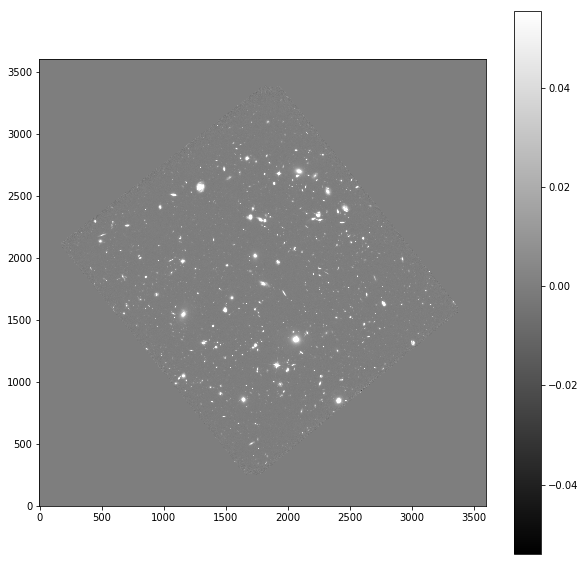

In [3]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [4]:
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data, bw=16, bh=16)

In [5]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005099902045913041


In [6]:
bkg_f105w = bkg.back()

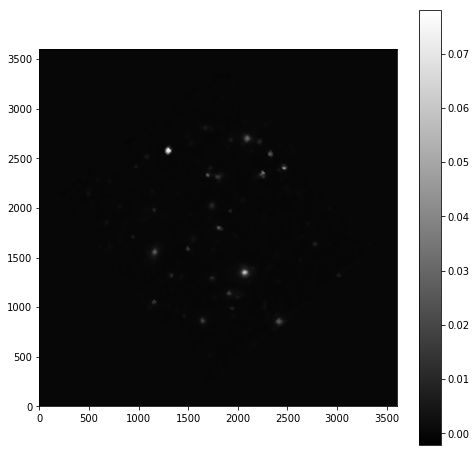

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [8]:
bkg_rms = bkg.rms()

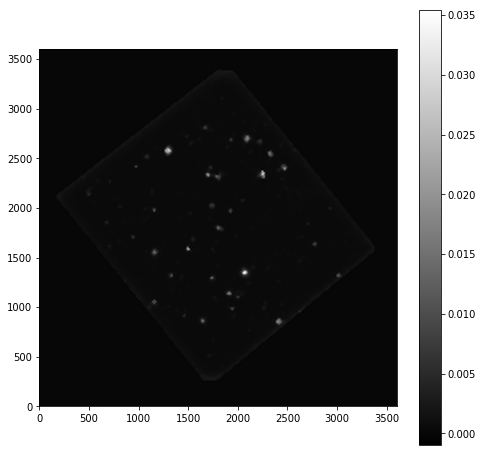

In [9]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [10]:
data_sub = data - bkg

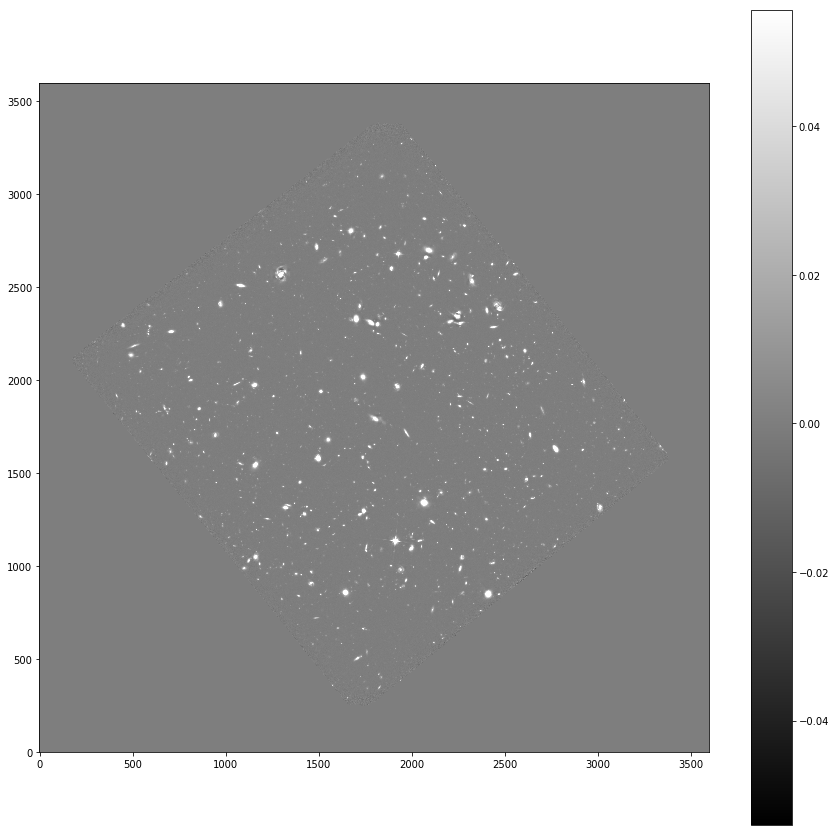

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [12]:
msk = data<=0.02
objects = sep.extract(data_sub, 3, err=bkg.globalrms, mask=msk)

In [13]:
len(objects)

810

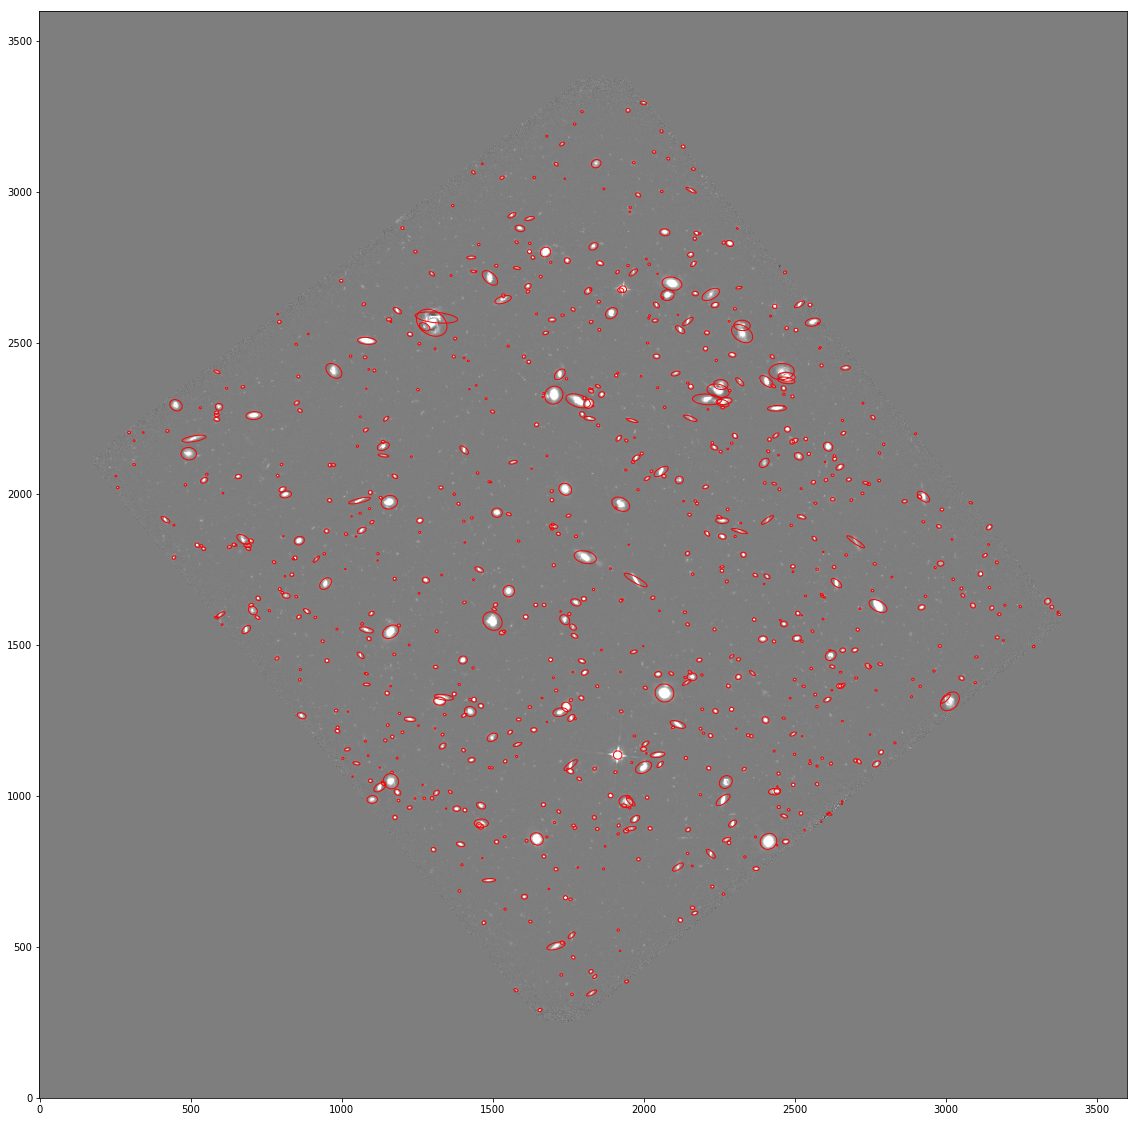

In [14]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [15]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,mask=msk, gain=1.0)

In [16]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 1.247050 +/- 1.116717
object 1: flux = 0.686795 +/- 0.828735
object 2: flux = 1.114998 +/- 1.055938
object 3: flux = 1.217056 +/- 1.103206
object 4: flux = 0.899049 +/- 0.948186
object 5: flux = 0.823192 +/- 0.907303
object 6: flux = 0.761383 +/- 0.872577
object 7: flux = 1.263850 +/- 1.124214
object 8: flux = 1.067958 +/- 1.033424
object 9: flux = 0.571732 +/- 0.756134


In [17]:
for i in range(810):
    Mags = {}
    Mags[i] = u.Magnitude(flux[i])
    print(Mags)

{0: <Magnitude 1.24705008 mag>}
{1: <Magnitude 0.68679456 mag>}
{2: <Magnitude 1.11499831 mag>}
{3: <Magnitude 1.21705583 mag>}
{4: <Magnitude 0.89904862 mag>}
{5: <Magnitude 0.82319183 mag>}
{6: <Magnitude 0.76138266 mag>}
{7: <Magnitude 1.26384954 mag>}
{8: <Magnitude 1.0679583 mag>}
{9: <Magnitude 0.57173152 mag>}
{10: <Magnitude 3.18421469 mag>}
{11: <Magnitude 0.83105919 mag>}
{12: <Magnitude 1.0527996 mag>}
{13: <Magnitude 0.67878291 mag>}
{14: <Magnitude 1.43656543 mag>}
{15: <Magnitude 0.85556561 mag>}
{16: <Magnitude 2.2282096 mag>}
{17: <Magnitude 1.21308372 mag>}
{18: <Magnitude 0.6362079 mag>}
{19: <Magnitude 0.80476338 mag>}
{20: <Magnitude 0.640895 mag>}
{21: <Magnitude 8.20261571 mag>}
{22: <Magnitude 1.29652715 mag>}
{23: <Magnitude 0.66673601 mag>}
{24: <Magnitude 0.7499287 mag>}
{25: <Magnitude 0.59049103 mag>}
{26: <Magnitude 0.94978142 mag>}
{27: <Magnitude 1.41938108 mag>}
{28: <Magnitude 0.67708784 mag>}
{29: <Magnitude 1.08661626 mag>}
{30: <Magnitude 0.58598227 

{396: <Magnitude 4.17814716 mag>}
{397: <Magnitude 0.65778807 mag>}
{398: <Magnitude 1.11451847 mag>}
{399: <Magnitude 0.5938203 mag>}
{400: <Magnitude 0.64578179 mag>}
{401: <Magnitude 0.57598284 mag>}
{402: <Magnitude 1.63872848 mag>}
{403: <Magnitude 0.61459832 mag>}
{404: <Magnitude 0.63146115 mag>}
{405: <Magnitude 1.04188934 mag>}
{406: <Magnitude 1.56689776 mag>}
{407: <Magnitude 1.20831754 mag>}
{408: <Magnitude 0.84423676 mag>}
{409: <Magnitude 0.73746647 mag>}
{410: <Magnitude 0.82499251 mag>}
{411: <Magnitude 0.78466574 mag>}
{412: <Magnitude 0.57731649 mag>}
{413: <Magnitude 0.98699082 mag>}
{414: <Magnitude 0.9527661 mag>}
{415: <Magnitude 0.63328087 mag>}
{416: <Magnitude 5.60675459 mag>}
{417: <Magnitude 0.77392543 mag>}
{418: <Magnitude 0.97895061 mag>}
{419: <Magnitude 0.70461005 mag>}
{420: <Magnitude 0.71896367 mag>}
{421: <Magnitude 2.41496054 mag>}
{422: <Magnitude 0.94259576 mag>}
{423: <Magnitude 0.57612657 mag>}
{424: <Magnitude 20.63335959 mag>}
{425: <Magnitud

In [18]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3600 / Axis length                                    
NAXIS2  =                 3600 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     
FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName 
OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-04T19:09:11'                                                 
IRAF-MAX=           7.444648E1  /  DATA MAX                                     
IRAF-MIN=         -9.047293E

In [19]:
sdata = data[250:3350:1,200:3400:1]

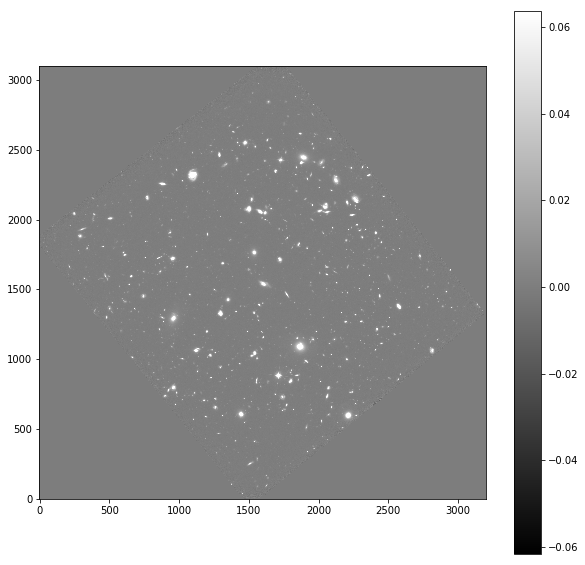

In [20]:
m, s = np.mean(sdata), np.std(sdata)
plt.figure(figsize=(10,10))
plt.imshow(sdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [78]:
sdata = sdata.copy(order='C')
mask_1 = sdata!=0
print(sdata[mask_1].shape)
resdata = sdata[mask_1].reshape(5307047,1)
sbkg = sep.Background(resdata, bw=16, bh=16)

(5307047,)


In [57]:
print(sbkg.globalback)
print(sbkg.globalrms)

7.485935930162668e-05
0.0004979067016392946


In [58]:
sbkg_f105w = sbkg.back()

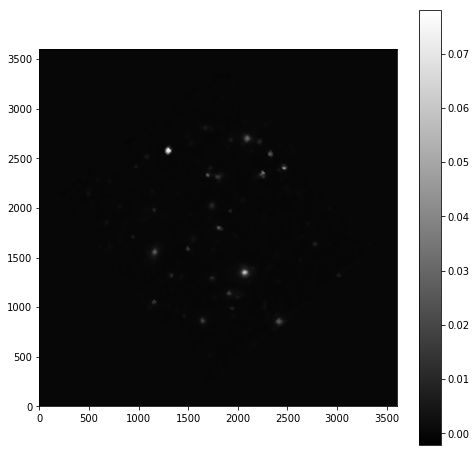

In [75]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [76]:
bkg_rms = bkg.rms()

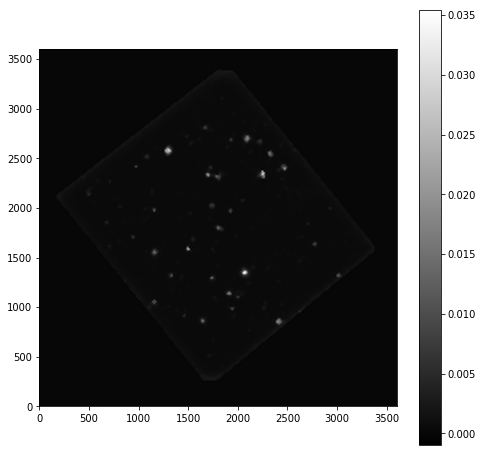

In [77]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [63]:
sdata_sub = resdata - sbkg

In [119]:
l = 0
fdata = {}
for i in range(sdata.shape[0]):
    for n in range(sdata.shape[1]):
        if(sdata[i][n]!=0):
            fdata[3200*i + n] = sdata_sub[l,0]
            l += 1
        else:
            fdata[3200*i + n] = sdata[i][n]
afdata = np.array(list(fdata.values()))

In [121]:
afdata.shape

(9920000,)

In [124]:
rafdata = afdata.reshape(3100,3200)
rafdata.shape

(3100, 3200)

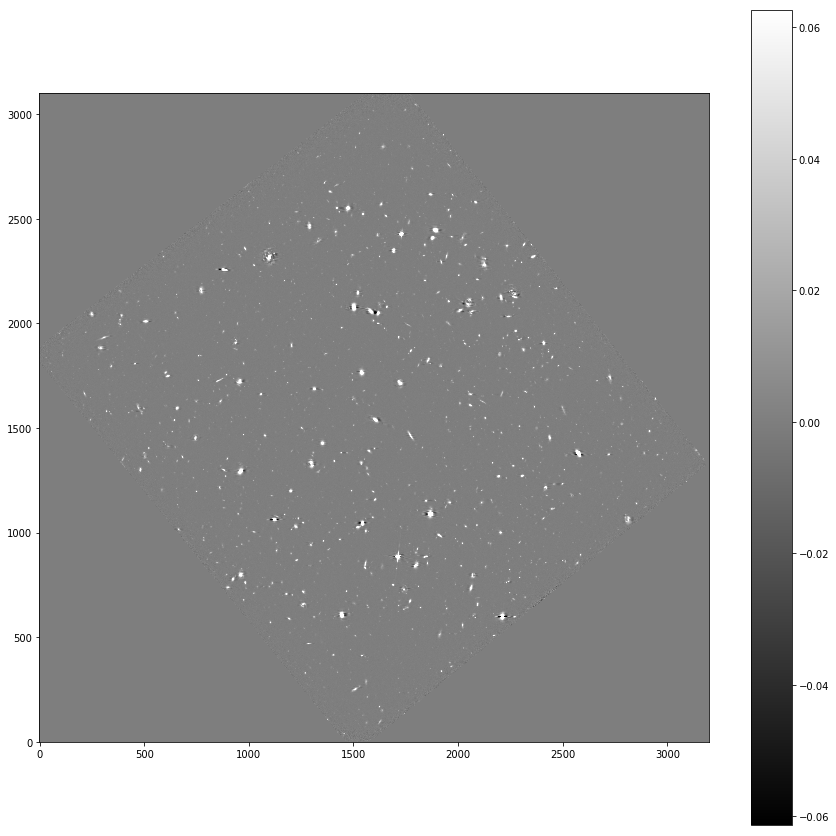

In [142]:
plt.figure(figsize=(15,15))
plt.imshow(rafdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [130]:
objects = sep.extract(rafdata, 3.0, err=sbkg.globalrms)

In [131]:
len(objects)

4956

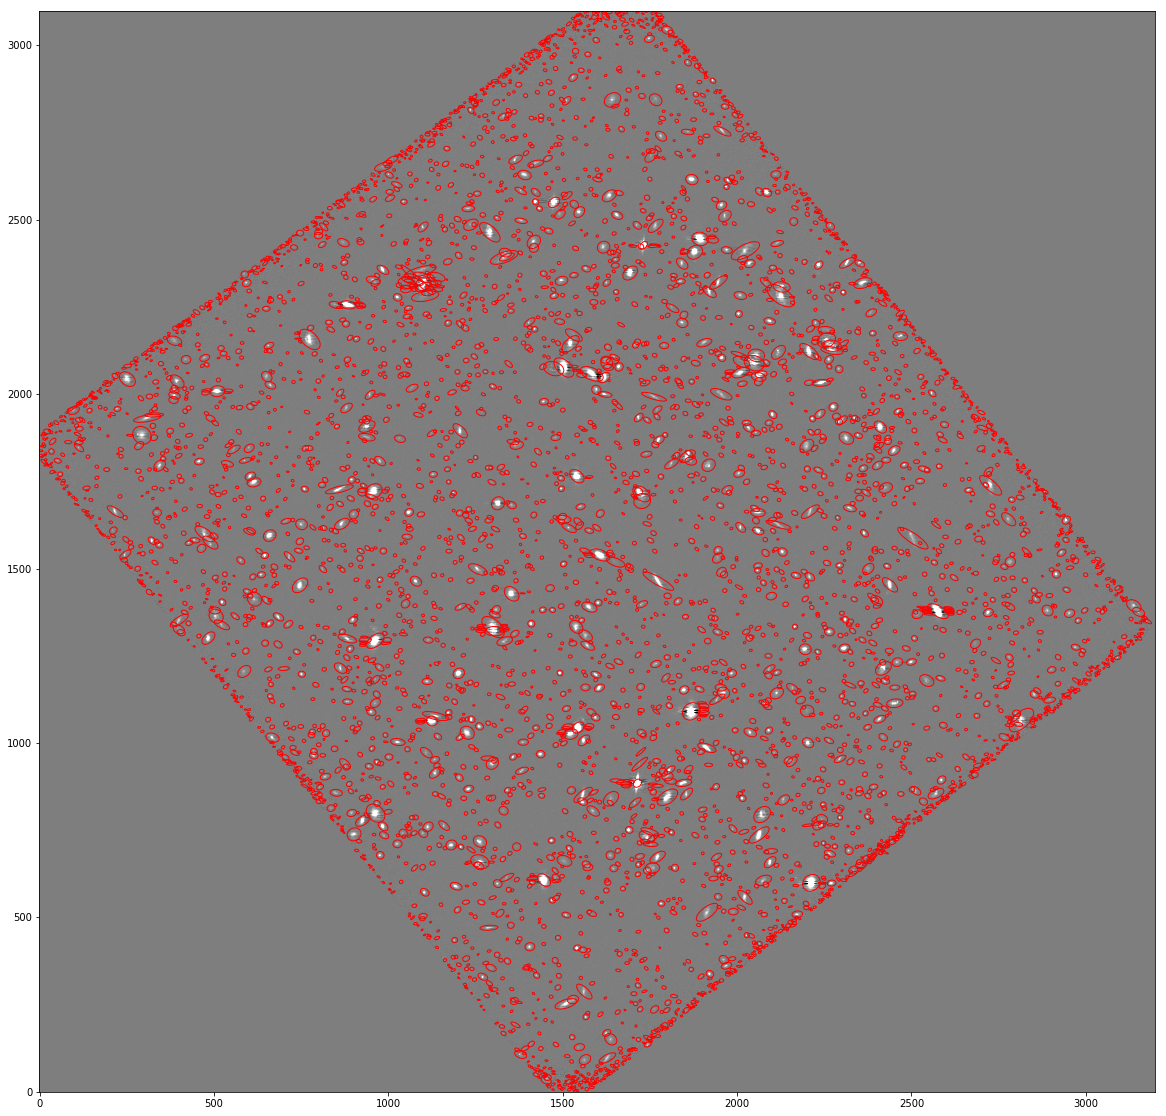

In [132]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(sdata), np.std(sdata)
im = ax.imshow(sdata, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [136]:
sflux, sfluxerr, sflag = sep.sum_circle(sdata,objects['x'],objects['y'],3.0,err=sbkg.globalrms, gain=1.0)

In [137]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,sflux[i],sfluxerr[i]))

object 0: flux = 0.030819 +/- 0.175568
object 1: flux = 0.027262 +/- 0.165134
object 2: flux = 0.001500 +/- 0.038816
object 3: flux = 0.071791 +/- 0.267952
object 4: flux = 0.069213 +/- 0.263097
object 5: flux = 0.041646 +/- 0.204091
object 6: flux = 0.009447 +/- 0.097232
object 7: flux = 0.005688 +/- 0.075467
object 8: flux = 0.037413 +/- 0.193444
object 9: flux = 0.027317 +/- 0.165300


(array([ 3.,  5.,  4.,  2.,  3.,  8.,  4.,  2.,  7.,  8.,  6., 13., 13.,
        19., 14., 22., 20., 15., 29., 31., 23., 36., 32., 56., 40., 32.,
        48., 44., 57., 69., 62., 85., 61., 65., 75., 84., 69., 69., 67.,
        75., 73., 64., 65., 57., 54., 64., 53., 51., 61., 42., 54., 42.,
        45., 43., 32., 51., 38., 33., 33., 40., 21., 33., 23., 33., 32.,
        26., 29., 20., 27., 28., 18., 28., 20., 20., 23., 20., 12., 18.,
        20., 21., 15., 20., 14., 21., 16., 25., 12., 17., 18., 15., 21.,
        15.,  9., 17., 19., 15., 18., 19., 11.,  8., 13., 20., 16., 15.,
        16.,  8., 12., 11.,  9., 15.,  6., 12.,  8.,  6., 12.,  6.,  8.,
         4.,  5.,  8., 13.,  6., 10., 14.,  9.,  7.,  8.,  7., 12., 10.,
         8.,  4., 16., 11.,  1., 10.,  6.,  9.,  7.,  7.,  8.,  7.,  6.,
         4., 11.,  6.,  4.,  5.,  4.,  7.,  7.,  7.,  6., 11., 10.,  4.,
         7.,  9.,  9.,  4.,  3.,  2.,  1.,  5.,  5.,  5.,  3.,  3.,  6.,
         5.,  4.,  5.,  4.,  6.,  3.,  4.,  8.,  2.

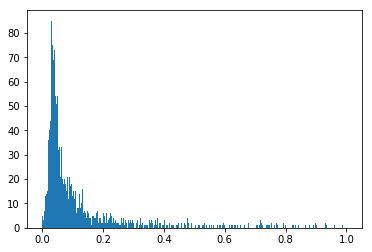

In [141]:
from astropy import visualization as vis

vis.hist(sflux,1000,range=(0,1))